# Python Machine Learning 3 - Model Selection

<p><a name="sections"></a></p>


## Sections

- <a href="#error">Training Error and Test Error</a><br>
- <a href="#cv">Cross Validation</a><br>
- <a href="#cv-sklearn">Cross Validation in Scikit-Learn</a><br>
    - <a href="#ex1">Exercise 1</a><br>
- <a href="#cvMore">More on Cross Validation Object</a><br>
    - <a href="#ex2">Exercise 2</a><br>
- <a href="#boot">Bootstrap</a><br>
- <a href="#boot-sklearn">Bootstrap in Scikit-Learn</a><br>
    - <a href="#boot-ex">Bootstrap Example for Statistics</a><br>
- <a href="#feature">Feature Selection</a><br>
    - <a href="#remove">Removing Features with Low Variance</a><br>
        - <a href="#ex3">Exercise 3</a><br>
    - <a href="#univariate">Univariate Feature Selection</a><br>
        - <a href="#ex4">Exercise 4</a><br>
- <a href="#reg">Regularization</a><br>
    - <a href="#ridge">Ridge Regression</a><br>
    - <a href="#ridge-sklearn">Ridge Regression in Scikit-Learn</a><br>
    - <a href="#lasso">Lasso Regression</a><br>
    - <a href="#lasso-sklearn">Lasso Regression in Scikit-Learn</a><br>
    - <a href="#elastic">ElasticNet</a><br>
    - <a href="#elastic-sklearn">ElasticNet in Scikit-Learn</a><br>
- <a href="#grid">Grid Search</a><br>
    - <a href="#validation_curves">Validation Curves</a><br>
- <a href="#ref">Reference</a><br>

<p><a name="error"></a></p>
## Training Error and Test Error

Recall the difference between the accuracy on the training data set and test data set.

Now we define **training error** and **test error** as:

- *training error* the error we get applying the model to the same data from which we trained.

- *test error* the error that we incur on new data. 
  - The test error is actually how well we'll do on future data the model hasn't seen
  
Training error almost always underestimates test error, sometimes dramatically.


**Problem of Underestimate**

- The goal of learning is try to minimize the error for future prediction. However this is always **unknown**.
- The prediction error can be represented by the test error if we carefully choose the test dataset.


**Solutions**

To estimate the test error:

- Ａ large test set is the best and simplest solution. Unfortunately, that is often unavailable.

- We consider that estimate the test error by holding out a subset of the training observations from the fitting process, and then applying the learning method to those held out observations.

**Validation**

- Concretely, we randomly divide the available set of samples into two parts: a **training set** and a **validation set**.

- Then fit the model based on the training set, and predict the responses for the observations in the validation set.

- The error of the validation set is an estimate of the test error. Typically,
    
    - For a quantitative response(regression problem), it's the MSE(mean square error)
    - For a qualitative response(classification problem), it's the misclassification rate

**Drawbacks of validation**

- The test error of the validation set may be highly variable, depending on how to split the data set

- Only a fraction of the observations are included in the training set used to fit the model, while the others are wasted.

- The validation set error may tend to overestimate the test error for the model fit on the entire data set, since some of the observations are not used in the fitting procedure.

<p><a name="cv"></a></p>
## Cross Validation
Instead of split the data set into two parts, divide the data into $K$ equal-sized parts. 

- We leave out part $k$, fit the model to the other $K − 1$ parts (combined), and then obtain predictions for the left-out kth part.
- This is done in turn for each part $k = 1, 2, . . . K$, and then the results are combined.

This is called the **k fold cross validation**, which is widely used to estimate the test error.




Here is simple example of divide data into 3 equal-sized parts:


part 1                                 | part 2                      | part 3
---------------------------------------|-----------------------------|-----
<font color="red">validation</font>    | train                       | train
train                                  | <font color="red">validation</font> | train
train | train | <font color="red">validation</font>

**Cross Validation For Regression**

- After dividing the data into $K$ parts, let $C_i$ denotes the $i$th part of the observations.

- Let $n_i$ denotes the number of the observations in $C_i$, $n$ denotes the total amount of the observations. If all the parts are equal-sized, then $n_i = \frac{n}{k}$ for $i=1, 2, 3, ... k$.

- The final test error is:
$$CV_k = \sum_{i=1}^{k}\frac{n_i}{n} MSE_i$$
while $MSE_i = \sum_{j\in c_i}\frac{1}{n_i}(y_j-\hat{y}_j)^2 \text{. } \hat{y}_j \text{ refers to the prediction of observation } j$.

**Cross Validation For Classification**

- After dividing the data into $K$ parts, let $C_i$ denotes the $i$th part of the observations.

- Let $n_i$ denotes the number of the observations in $C_i$, $n$ denotes the total amount of the observations. If all the parts are equal-sized, then $n_i = \frac{n}{k}$ for $i=1, 2, 3, ... k$.

- The final test error is:
$$
\text{ }
CV_k = \sum_{i=1}^{k}\frac{n_i}{n} Error_i \quad
\text{ }
$$
while $Error_i = \sum_{j\in c_i}\frac{1}{n_i} (y_j !=\hat{y}_j) \quad\text{. } \hat{y}_j \text{ refers to the prediction of observation } j.$

- The estimated standard deviation of $CV_K$ is:
$$SD(CV_K) = \sqrt{ \frac{1}{K-1} \sum_{i=1}^{K} (Error_i - \bar{Error})^2 }$$

**Leave One Out Cross Validation**

Particularly, if $k=n$, namely divide the data set into $n$ parts. Each observation is a unique part. This method is called **Leave one out cross validation(LOOCV for short)**.

- LOOCV sometimes is useful, especially the data set is very small
- LOOCV dose not shake up the data enough. In case of each fold are highly correlated, the average can have high variance
- The computation of LOOCV is expensive

So in practice, we rarely use LOOCV. $K=5$ or $K=10$ is commonly used.

<p><a name="cv-sklearn"></a></p>
## Cross Validation in Scikit-Learn

The following functions list utilities to generate indices that can be used to generate data set splits according to different cross validation strategies.

- **KFold**: divide all the observation into $k$ parts
- **StratifiedKFold**: a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.
- **LeaveOneOut**: devide all the $n$ observation into $n$ parts

**KFold**


Generate the index by function `KFold`:

WARNING: While the model_selection (new in 0.18) and cross_validation (deprecated in 0.18) have functions and objects of the same name, the interface has changed. cross_validation may be removed as soon as 2018 (in version 0.20). For now, I'll show both packages

In [1]:
import sklearn
assert(sklearn.__version__ > '0.18' and sklearn.__version__ < '0.20')

In [2]:
import numpy as np
import sklearn.model_selection as ms
# divide 6 samples into 3 parts
sample = np.array(range(6))
print('All data: {}'.format(sample))
ms_k3 = ms.KFold(n_splits=3)
for train_idx, val_idx in ms_k3.split(sample):
    print('Train:', train_idx, 'Validation:', val_idx)

All data: [0 1 2 3 4 5]
Train: [2 3 4 5] Validation: [0 1]
Train: [0 1 4 5] Validation: [2 3]
Train: [0 1 2 3] Validation: [4 5]


In [3]:
import sklearn.cross_validation as cv
cv_k3 = cv.KFold(6, n_folds=3)
for train_idx, val_idx in cv_k3:
    print('Train:', train_idx, 'Validation:', val_idx)

Train: [2 3 4 5] Validation: [0 1]
Train: [0 1 4 5] Validation: [2 3]
Train: [0 1 2 3] Validation: [4 5]


C:\Users\mlu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
y = np.array([0, 0, 1, 1, 1, 1])
for train_idx, val_idx in ms_k3.split(y):
    print('Train:', y[train_idx], 'Validation:', y[val_idx])

Train: [1 1 1 1] Validation: [0 0]
Train: [0 0 1 1] Validation: [1 1]
Train: [0 0 1 1] Validation: [1 1]


In [5]:
for train_idx, val_idx in cv_k3:
    print('Train:', y[train_idx], 'Validation:', y[val_idx])

Train: [1 1 1 1] Validation: [0 0]
Train: [0 0 1 1] Validation: [1 1]
Train: [0 0 1 1] Validation: [1 1]


**StratifiedKFold**

In the last case, the distribution of validation set is highly variable.

- In the first division, all the labels in the validation part are 0
- In the last two divisions, all the labels in the validation part are 1

This is due to the skew distribution of the original data. So it's better to use the function *StratifiedKFold*. As the data set is small, we create a larger set with 9 samples.

In [8]:
x = np.zeros(9)
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

ms_k3s = ms.StratifiedKFold(n_splits=3)
for train_idx, val_idx in ms_k3s.split(X=x, y=y):
    print('Train:', y[train_idx], 'Validation: ', y[val_idx])

Train: [0 0 1 1 1 1] Validation:  [0 1 1]
Train: [0 0 1 1 1 1] Validation:  [0 1 1]
Train: [0 0 1 1 1 1] Validation:  [0 1 1]


In [9]:
cv_k3s = cv.StratifiedKFold(y, n_folds=3)
for train_idx, val_idx in cv_k3s:
    print('Train:', y[train_idx], 'Validation: ', y[val_idx])

Train: [0 0 1 1 1 1] Validation:  [0 1 1]
Train: [0 0 1 1 1 1] Validation:  [0 1 1]
Train: [0 0 1 1 1 1] Validation:  [0 1 1]


**train_test_split**

The last three functions just return the indices of the training set and validation set. In scikit-learn, function **train_test_split**  can be used to generate a random split into training and test sets more quickly and directly.

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = ms.train_test_split(iris.data, iris.target, 
                                                       test_size=1.0/3, random_state=0)
print('Original: {}, {}'.format(iris.data.shape, iris.target.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))

Original: (150, 4), (150,)
Training: (100, 4), (100,)
Test: (50, 4), (50,)




There are three important arguments to be setted in the function **train_test_split**：

- **train_size**: Represent the proportion of the dataset to include in the training split, should be 0.0 to 1.0.
- **test_size**: Represent the proportion of the dataset to include in the test split, should be 0.0 to 1.0.
- **random_state**: Pseudo-random number generator state used for random sampling.

*train_size* and *test_size* should be setted one of them.

<p><a name="ex1"></a></p>
### Exercise 1

In this exercise we want to randomly split the iris dataset into **training dataset** and **test dataset** and then fit **logistic regression** models.

To test the fitting result, we repeat the step for **5 times** and find the mean and standard deviation.

- We first create a logistic regression model and create empty lists to collect the errors.

In [96]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()
train_error = []
test_error = []

Write a for loop to:
- Use `train_test_split` function to split 
 - 1/3 of the data as the testing set.
 - 2/3 of the data as the training set.
- Then fit the model and append the errors in the correct lists.

In [97]:
#### Your code here
X_test sklearn.model_selection.train_test_split(0.333)

Report the list of training and test errors. Compute the mean and the standard deviation of the errors.

In [98]:
#### Your code here

Training Error: [ 0.05  0.04  0.05  0.03  0.04]
Test Error: [ 0.1   0.12  0.08  0.08  0.06]
Test Error Mean: 0.088000
Test Error SD: 0.020396


We can see that the test error is always higher than the training error. And the mean error is 8.8%, while the standard deviation is 0.0204.

<p><a name="cvMore"></a></p>

## More on Cross Validation Object

**cross_val_score**

- To implement cross validation, the function **train_test_split** is still complicated.

- If we just want to know the test error, the simplest way is to use **cross_val_score**.

Here is a simple example of 5 fold cross validation with logistic regression:

In [99]:
logit = linear_model.LogisticRegression()
scores = ms.cross_val_score(estimator=logit, X=iris.data, y=iris.target, cv=5)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]
Score mean: 0.9600000000000002
Score std deviation: 0.038873012632301994


**`cross_val_score` with cross validation object**

- The first argument of **cross_val_score** is a model. It's a logistic regression in this case. 

- The second and third argument refers to the predictors and the response. 

- The **cv** argument determines the splitting of cross validation. It's an integer  5 in this case. but it can be a **cross-validation object** as well. 

Here is a case that we randomly divide the data set by **KFold**:

In [100]:
random_divide = ms.KFold(n_splits=5)
scores = ms.cross_val_score(estimator=logit, X=iris.data, y=iris.target, cv=random_divide)
scores

array([ 1.        ,  0.93333333,  0.43333333,  0.96666667,  0.43333333])

In [101]:
random_divide = cv.KFold(n=150, n_folds=5)
scores = cv.cross_val_score(estimator=logit, X=iris.data, y=iris.target, cv=random_divide)
scores

array([ 1.        ,  0.93333333,  0.43333333,  0.96666667,  0.43333333])

We can also use **StratifiedKFold** to split the dataset more evenly among different classes

In [102]:
stratify_divide = ms.StratifiedKFold(n_splits=5, random_state=0)
scores = ms.cross_val_score(estimator=logit, X=iris.data, y=iris.target, cv=stratify_divide)
scores

array([ 1.        ,  0.96666667,  0.93333333,  0.9       ,  1.        ])

In [103]:
stratify_divide = cv.StratifiedKFold(y=iris.target, n_folds=5, random_state=0)
scores = cv.cross_val_score(estimator=logit, X=iris.data, y=iris.target, cv=stratify_divide)
scores

array([ 1.        ,  0.96666667,  0.93333333,  0.9       ,  1.        ])

**Test Error and Number of Folds**

Now we want to examine the trend of mean and standard deviation of test error in KFold cross validation along increasing number of folds (from 3 to 50)

In [104]:
mean_error = []
std_error = []
kfold = range(3, 50)
for i in kfold:
    scores = ms.cross_val_score(logit, iris.data, iris.target, cv=i)
    mean_error.append(1 - scores.mean())
    std_error.append(scores.std())

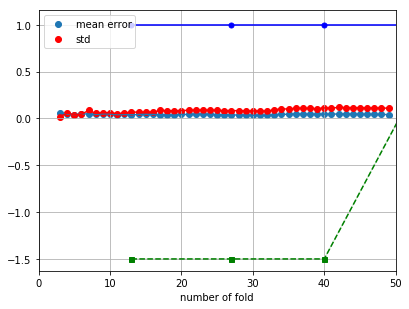

In [105]:
import matplotlib.pyplot as plt
s1 = plt.scatter(kfold, mean_error, label='mean error')
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std')
plt.plot(kfold, std_error, color='red')
plt.xlim(0, 50)
plt.xlabel('number of fold')
plt.legend(handles=[s1, s2], loc=2)
plt.show()

<p><a name="ex2"></a></p>

### Exercise 2
Run the following codes to generate a random data set. Then answer the following three questions with the data set.

In [106]:
import numpy as np

n = 500
np.random.seed(1)
X = np.random.randn(n, 2)
y = np.ones(n)
y[X[:, 0] + X[:, 1] > 0] = 0

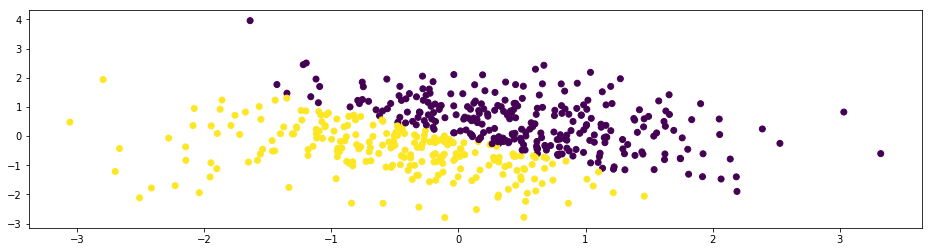

In [107]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

- Use the function **train_test_split** to divide the data set into two equal parts: training set and test set. Fit a **Linear Discriminant Analysis** model on the training set and make a prediction on the test error. What's the training error and test error?

In [108]:
import sklearn.model_selection as ms
from sklearn import discriminant_analysis
model = discriminant_analysis.LinearDiscriminantAnalysis()

#### Your code here

## use train_test_split to split the dataset into training and test datasets

## fit a LDA model with x_train, y_train
## Train and test error will vary with random split

Training Error: 0.020000
Test Error: 0.016000


/Users/rheineke/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


- Use the function **KFold** to implement 5-fold cross validation with a **Linear Discriminant Analysis** model. Report the training errors and test errors.

In [109]:
#### Your code here
    
## Find the training error

## Find the test error

Train error: [ 0.0175  0.0225  0.0125  0.015   0.02  ]
Test error: [ 0.03  0.01  0.02  0.02  0.  ]


- Use the function **cross_val_score** to implement 5-fold cross validation with a **Linear Discriminant Analysis** model. Report the test errors.

In [110]:
## Use the function cross_val_score() to 
## implement 5-fold cross validation with 
## a Linear Discriminant Analysis model.
scores = ms.cross_val_score(model, X, y ,cv=5)

## test errors.
1 - scores

array([ 0.02970297,  0.00990099,  0.03      ,  0.01010101,  0.01010101])

In [111]:
import pandas as pd
adver = pd.read_csv('data/adver.csv', index_col=0)
x = adver[['TV', 'Radio', 'Newspaper']]
y = adver[['Sales']]
adver.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<p><a name="boot"></a></p>

## Bootstrap

**Bootstrap** is another resampling method which:

- resample from the data set with replacement, not just division.

- method is a powerful tool that can be used to quantify the uncertainty associated with a given estimator or learning algorithm.

- can provide an estimate of the standard error or confidence interval of a coefficient.


To quantify the uncertainty associated with a given estimator $\alpha$:

- Generate the first bootstrap data denoted by $B^{*1}$, use $B^{*1}$ to produce a new bootstrap estimate for $\alpha$, denoted by $\alpha^{*1}$.
- Repeat the first step $K$ times, so that we have $K$ bootstrap data $B^{*1}, B^{*2}...B^{*K}$, as well as $K$ estimates $\alpha^{*1}, \alpha^{*2}...\alpha^{*K}$.
- We estimate the standard error of these estimates by the formula:
$$\sigma_{\alpha} = \sqrt{ \frac{1}{K-1} \sum_{i=1}^{K} (\alpha^{*i} - \bar{\alpha^*})^2 }$$

**Bootstrap for Validation**

**Can bootstrap be used to estimate the test error?**

- One way is fit models based on the bootstrap data and test on the original data.
- Since there are many *overlap* between the bootstrap data and the original data, it will seriously underestimate the test error.
- In cross validation, each of the K validation folds is distinct from the other K − 1 folds used for training: there is no overlap. This is crucial for its success.

To estimate the test error using bootstrap,  we can only use predictions for those observations that did not occur in the current bootstrap sample.

- Generate a bootstrap data $B^{*i}$, fit a model $M^{*i}$.
- Make a prediction on the observations that are not in $B^{*i}$
- Repeat the first two steps $K$ times

This is called **Out Of Bag Error (OOB Error)**.

- The OOB error is complicated to calculate.
- Since each bootstrap data in randomly sampling from the original data, we have no idea how many *observations out of bag* left for testing. So we would loose control on the test fold size.
- Cross validation is a simpler and more natural way to estimate the validation scores.

<p><a name="boot-sklearn"></a></p>
## Bootstrap in Scikit-Learn

In [112]:
from sklearn.utils import resample
y = np.array([1, 2, 3, 4, 5])
print("The original data: " + str(y))
y_bs = resample(y)
print("The bootstrap sample: " + str(y_bs))

The original data: [1 2 3 4 5]
The bootstrap sample: [4 5 3 5 4]


- By default, the number of bootstrap samples is equal to the number in the original data.

- To generate a dataset with less samples, we can change the parameter n_samples of the method:

- Note that n_samples cannot be greater than the size of the dataset

In [113]:
resample(y, n_samples=3)

array([4, 5, 2])

The `resample()` method also support multiple samplings:

In [114]:
x = np.random.randn(5, 2)
y = np.array([1, 2, 3, 4, 5])
print('x = \n{}\n\ny = \n{}'.format(x, y))

x = 
[[-0.79005463  1.48456404]
 [-1.49407675  1.42576245]
 [-0.50164618  1.0674858 ]
 [ 1.95691216 -1.9536945 ]
 [ 1.18257238 -0.69302077]]

y = 
[1 2 3 4 5]


In [115]:
x_bs, y_bs = resample(x, y) # sampling x and y at the same time
print('x = \n{}\n\ny = {}'.format(x_bs, y_bs))

x = 
[[ 1.95691216 -1.9536945 ]
 [ 1.18257238 -0.69302077]
 [-1.49407675  1.42576245]
 [ 1.18257238 -0.69302077]
 [-0.50164618  1.0674858 ]]

y = [4 5 2 5 3]


### Bootstrap Example for Statistics

Here is a example of estimating the standard error of the coefficients in linear regression.

We will use the advertise data set in the "adver.csv" file.

In [116]:
import pandas as pd
adver = pd.read_csv('data/adver.csv', index_col=0)
x = adver[['TV', 'Radio', 'Newspaper']]
y = adver[['Sales']]
adver.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- This time we will employ the bootstrap method to calulate the standard error of the coefficients.
- Generate 1000 bootstrap samples and then fit a regression model.
- Calculate the mean and standard error of the coefficients of the bootstrap samples.

In [117]:
import numpy as np
from sklearn import linear_model
ols = linear_model.LinearRegression()

from sklearn.utils import resample
coefs = []
for i in range(1000):
    x_boot, y_boot = resample(x, y)
    ols.fit(x_boot, y_boot)
    coefs.append(ols.coef_[0])

coefs = np.array(coefs)
print("The mean of the coefficients are: " + str(np.mean(coefs, 0)))
print("The standard error of the coefficients are: " + str(np.std(coefs, 0)))

The mean of the coefficients are: [ 0.04570398  0.18869961 -0.00085747]
The standard error of the coefficients are: [ 0.00186459  0.01110836  0.00645294]


- The coefficients of the model fitting with the whole data set are:

In [118]:
ols.fit(x, y)
print("Coefficients with Entire dataset: ", ols.coef_)
print("Bootstrap estimates: ", np.mean(coefs, 0))

Coefficients with Entire dataset:  [[ 0.04576465  0.18853002 -0.00103749]]
Bootstrap estimates:  [ 0.04570398  0.18869961 -0.00085747]


- The two sets of coefficients are very close.
- Bootstrap can estimate the standard error of the coefficients.



- Further more, we can constract a confidence interval for the coefficients.
- If confidence intervals are constructed across many separate data analyses of repeated (and possibly different) experiments, the proportion of such intervals that contain the true value of the parameter will match the confidence level.
- The simplest way is calculate the quantiles of the coefficients.

Here is confidence interval with 95% confidence level:

In [119]:
np.percentile(coefs, [2.5, 97.5], 0)

array([[ 0.04196412,  0.16693456, -0.01280246],
       [ 0.04930857,  0.20983559,  0.01233142]])

- The interval of the TV's coefficient is [0.0421, 0.0496]
- The interval of the Radio's coefficient is [0.1674, 0.2093]
- The interval of the Newspaper's coefficient is [-0.0136, 0.0128]

**Constructing Confidence Interval with Standard Errors**

- Another way to constract the confidence interval is assume that the distribution of coefficients as gaussian distribution. 
- For gaussian distribution, the 95% confidence interval is :
$$[\mu - 2\sigma, \mu + 2\sigma ]$$
where $\mu$ refers to the expectation and $\sigma$ refers to the standard deviation.

In [120]:
## Calculate the 95% confidence interval of the coefficient using equation
print(np.mean(coefs, 0) - 2*np.std(coefs, 0))
print(np.mean(coefs, 0) + 2*np.std(coefs, 0))

[ 0.0419748   0.16648288 -0.01376334]
[ 0.04943316  0.21091633  0.0120484 ]


Finally we can plot the histogram of coefficients estimated with bootstrap resampling:

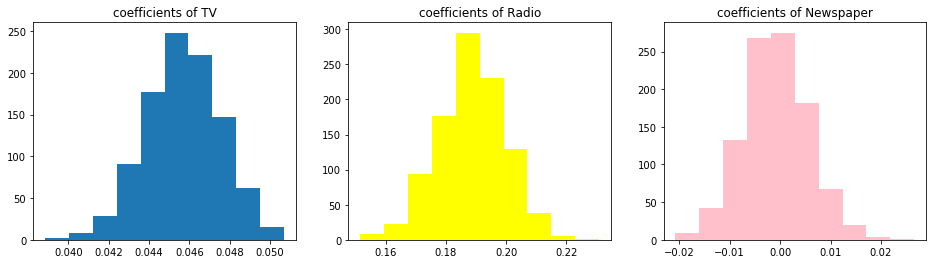

In [121]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 4)
import matplotlib.pyplot as plt

xxx, sub = plt.subplots(1, 3)
sub[0].hist(coefs[:, 0])
sub[0].set_title('coefficients of TV')
sub[1].hist(coefs[:, 1], color='yellow')
sub[1].set_title('coefficients of Radio')
sub[2].hist(coefs[:, 2], color='pink')
sub[2].set_title('coefficients of Newspaper')
plt.show()

<p><a name="feature"></a></p>
## Feature Selection 

- Feature selection is the process of selecting a subset of relevant features for use in model construction. It's also known as **variable selection**.

- Many areas including `text processing of internet documents`, `gene expression array analysis`, and `combinatorial chemistry` often have tens or hundreds of thousands of variables available. Feature selection is crucial.

- The goals of feature selection are:
    - improving prediction performance
    - providing faster and more cost-effective predictors
    - providing a better understanding of the underlying process that generated the data

- In practice, feature selection often needs some background knowledge to determine which predictors to select.
- We will introduce some basic methods from a mathematics perspective:
    - Removing features with low variance
    - Univariate feature selection
    - L1-based feature selection
    - Tree-based feature selection

<p><a name="remove"></a></p>
### Removing Features with Low Variance

- If a predictor has the same value in all observations, it's useless.
- In linear regression, if a predictor is invariant, $X^TX$ will be singular. 
- The **VarianceThreshold** function is used to remove features with low variance. 

- **VarianceThreshold** removes all features whose variances don’t meet some thresholds. 
- By default, it removes all zero-variance features, i.e. features that have the same values among all samples.

Here is a short example:

- There are four features in the iris data set: *sepal length, sepal width, petal length, petal width*.
- The variances of the features are:

In [122]:
from sklearn import datasets
import numpy as np
import pprint
iris = datasets.load_iris()
print('Shape: (%d, %d)' %iris.data.shape)
print('Variation:')
pprint.pprint(dict(zip(iris.feature_names, np.var(iris.data, 0))))

Shape: (150, 4)
Variation:
{'petal length (cm)': 3.0924248888888854,
 'petal width (cm)': 0.57853155555555591,
 'sepal length (cm)': 0.68112222222222218,
 'sepal width (cm)': 0.1867506666666667}


Let's try to remove features with variances smaller than 1:

In [123]:
import sklearn.feature_selection as fs
x_new = fs.VarianceThreshold(threshold = 1).fit_transform(iris.data)
x_new.shape

(150, 1)

- The argument "threshold=1" is used to define the threshold.
- After the selection, the new variable $x\_new$ has only one predictor.

<p><a name="ex3"></a></p>

#### Exercise 3

Run the following code to obtain the data:

In [124]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/data.csv')
print(data.head())
X = np.array(data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']])
y = np.array(data[['y']])

         x1        x2        x3        x4         x5         x6         y
0  1.624345  2.638498  4.285832  6.961671  11.308158  18.368354 -6.403283
1 -0.611756  0.374246 -0.228947  0.140060  -0.085683   0.052417  2.048085
2 -0.528172  0.278965 -0.147342  0.077822  -0.041103   0.021710  0.875276
3 -1.072969  1.151262 -1.235268  1.325403  -1.422116   1.525886  5.528936
4  0.865408  0.748930  0.648130  0.560897   0.485404   0.420073 -0.676034


There are 7 variables in total. Select the best features from $x1, x2, x3, ..., x6$ to predict $y$.

- Use the function **`VarianceThreshold`** to select the features whose variance is larger than 10. Assign the return of the `VarianceThreshold` function to `select1`.
 - How many features do you select?

In [125]:
import sklearn.feature_selection as fs
#### Your code here

(100, 3)


- Print out the first row of the features you select. Compare it to the first row of X. What features did you select.

In [126]:
#### Your code here

[  6.96167096  11.30815795  18.36835393]
[  1.62434536   2.63849786   4.28583177   6.96167096  11.30815795
  18.36835393]


<p><a name="univariate"></a></p>
### Univariate Feature Selection

- Univariate feature selection is based on the univariate statistical tests.
- The tests we are using can be set manually.
    - For regression problems, the most commonly used test is the F test.
    - For classification problem, the most commonly used tests are the chi-square test and the F test.

- Function **`chi2`** is used to perform a $\chi^2$ test
- Function **`f_regression`** is used to perform an $F$ test for regression problems
- Function **`f_classifier`** is used to perform an $F$ test for classification problems

For instance, we can perform a $\chi^2$ test on the iris data. Test each feature with the response variable:

In [127]:
fs.chi2(iris.data, iris.target)

(array([  10.81782088,    3.59449902,  116.16984746,   67.24482759]),
 array([  4.47651499e-03,   1.65754167e-01,   5.94344354e-26,
          2.50017968e-15]))

- The first array is the $\chi^2$ statistics
- The second array is the corresponding $p$ value
- Larger statistics and smaller $p$ values mean a significant relation
- In this case the last two features have the smallest $p$ values and the largest $\chi^2$ statistics

#### SelectKBest

We can use the following two functions to select features directly:

- **SelectKBest**: keeps the $k$ highest scoring features
- **SelectPercentile**: keeps a user-specified highest scoring percentage of features

We use the function **SelectKBest** to select the best 2 features using the chi-square test:

In [128]:
best2 = fs.SelectKBest(fs.chi2, k=2).fit_transform(iris.data, iris.target)
best2.shape

(150, 2)

- Arguments in *fit_transform* should be the predictors and response variable
- *fs.chi2* in *SelectKBest* means using the chi-square test
- $k=2$ selects the best two features

In [129]:
print(best2[:3,])
print(iris.data[:3,])

[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]


We can see here: compared to the original predictors, the selected features are the last two features.

In [130]:
percent80 = fs.SelectPercentile(fs.chi2, 80).fit_transform(iris.data, iris.target) 
percent80.shape

(150, 3)

**SelectPercentile** is useful when there are thousands of features to choose from.

**Does this method really work?**

- Let's add 10 columns of random noise into the iris data set.
- Try to select the original true features using the **SelectKBest** method.

In [131]:
nrow = iris.data.shape[0]
noise = np.random.rand(nrow, 10)
X_noise = np.column_stack((iris.data, noise)) # add noise 
best4 = fs.SelectKBest(fs.chi2, k=4).fit_transform(X_noise, iris.target) # select
print("The selected features are: " + '\n' + str(best4[:3, ])) # print the selected features
print("The true features are: " + '\n' + str(iris.data[:3, ])) # print the true features

The selected features are: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
The true features are: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]


- For regression problems, we usually use the *f_regression* function to perform an F test.
- Let's say we want to predict the fourth feature based on the first three features.
- Select the best feature.

In [132]:
iris.x = iris.data[:, 0:3]
iris.y = iris.data[:, 3]
best1 = fs.SelectKBest(fs.f_regression, k=1).fit_transform(iris.x, iris.y)
print(best1[:3, :])
print(iris.x[:3, :])

[[ 1.4]
 [ 1.4]
 [ 1.3]]
[[ 5.1  3.5  1.4]
 [ 4.9  3.   1.4]
 [ 4.7  3.2  1.3]]


We can see that this method selects the third feature as the best one.

In [133]:
np.corrcoef(iris.data.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

By checking the coefficient of the correlation between the features, the coefficient of the last two features is 0.9627.

<p><a name="ex4"></a></p>
#### Exercise 4

With the data we loaded in the last exercise:

- Use the function **SelectKBest** to select the best 3 features using the F test(*f_regression*). What are their names?

In [134]:
import sklearn.feature_selection as fs
#### Your code here, call the result select2

(100, 3)



- Print out the first row of the features you select. Compare it to the first row of X. What are the features did you select. 

In [135]:
#### Your code here

[  1.62434536   4.28583177  11.30815795]
[  1.62434536   2.63849786   4.28583177   6.96167096  11.30815795
  18.36835393]


** Appendix ** Here is how the data is generated:

In [136]:
import numpy as np
np.random.seed(1)
m = 100
x = np.random.randn(m) 
y = x + 2 * x**2 - 3 * x**3 + np.random.randn(m)
X = np.column_stack((x, x**2, x**3, x**4, x**5, x**6))
data = pd.DataFrame(np.column_stack((X, y)))
data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y']
data.to_csv('data/data_new.csv', index=False)

- The features in the true model are $x1, x2, x3$. 
- Compare the features you selected in question 1 and question 2 with the true features, what do you find?

- The features selected in question 1 do not match any of the true features.
- Two of the true features are included in the result for question 2.

So:
- Features with high variance do not mean they are more likely to be related to the response variable.
- The argument *threshold* in **VarianceThreshold** should be set low to remove the features that are nearly invariable.
- F test is more reliable to choose features.

<p><a name="reg"></a></p>

## Regularization
- Fit a model using a technique that regularizes the coefficient estimates, or equivalently, that shrinks the coefficient estimates towards zero. 

- Shrinking the coefficient estimates can significantly reduce their variances.

- The two best-known techniques of shrinking methods are **ridge regression** and **lasso**.

<p><a name="ridge"></a></p>
### Ridge Regression

- Recall that the least squares procedure estimates $\beta$ by minimizing
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2$$

- The **ridge regression** instead estimates $\beta$ by minimizing
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}\beta_j^2$$

where $\lambda \ge 0$ is a *tuning parameter* to be determined.


- By adding the term $\lambda \sum_{j=1}^{k}\beta_j^2$ in the loss function, the estimation will try to shrink the parameters toward 0, hence this term is also called the **shrinkage penalty**. This is also called **L2 penalty**.

- The tuning parameter $\lambda$ is used  to control the relative impact of these two terms on the regression coefficient estimates. 
    - When $\lambda = 0$, the ridge estimate is the same  with the least square estimate. 
    - When $\lambda \to \infty$, all the parameters except $\beta_0$ will be 0, because we do not penalize $\beta_0$ in the loss function. 

- Selecting a good value for $\lambda$ is critical. In practice, we will try a grid of  $\lambda$ values and choose the best one.

<p><a name="ridge-sklearn"></a></p>
### Ridge Regression in Scikit-Learn

If you read the documentation of **Ridge** in python, the objective function implemented is:

$$\min_{\theta}  \parallel X\theta - y \parallel_2^2 + \alpha \parallel \theta \parallel_2^2$$

which is the same as the previous formula, except they used $\theta \text{ and } \alpha \text{ in the place of } \beta \text{ and } \lambda$.

Traininging ridge regresison is similar to linear regression:

In [137]:
## prepare data
import pandas as pd
import numpy as np
adver = pd.read_csv('data/adver.csv', index_col=0)
x = np.array(adver[['TV', 'Radio', 'Newspaper']])
y = np.array(adver['Sales'])

In [138]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([ 0.04576464,  0.1885251 , -0.00103629]), 2.9389674583301524)

In [139]:
## determination
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))

The determination of ridge regression is: 0.8972


In [140]:
## prediction 
ridge.predict([[5.2, 18.5, 3.7]])

array([ 6.66082361])

Here is an example showing how the coefficients vary as the parameter $\alpha$ increases.

In [141]:
from sklearn import linear_model
ridge = linear_model.Ridge()

- Below we want to train a ridge model for each $\alpha$, we collect the coefficients in the coef list for visualization later. Complete the for loop below.

In [142]:
alpha_100 = np.logspace(0, 8, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x, y)
    coef.append(ridge.coef_)

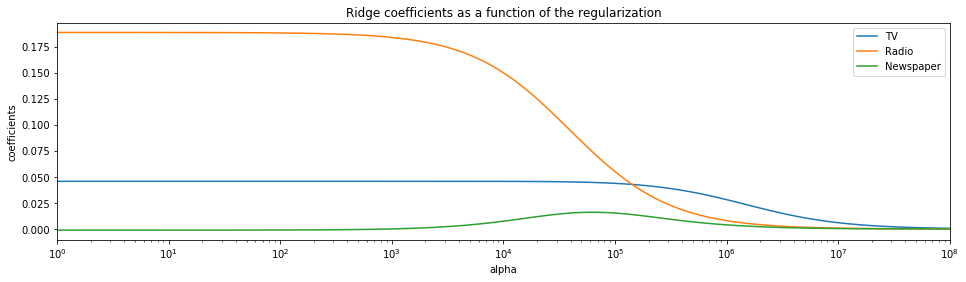

In [143]:
df_coef = pd.DataFrame(coef, index=alpha_100, columns=['TV', 'Radio', 'Newspaper'])
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

Another example using the iris data:

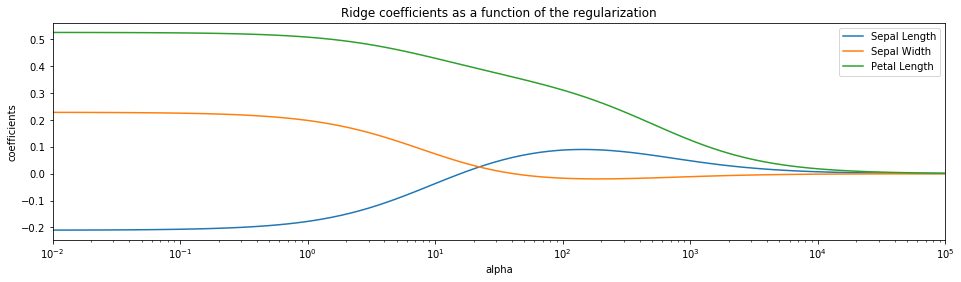

In [144]:
from sklearn import datasets
iris = datasets.load_iris()
# use the first three variables to predict the fourth variable
iris.x = iris.data[:, :3]
iris.y = iris.data[:, 3]

alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(iris.x, iris.y)
    coef.append(ridge.coef_)

columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

<p><a name="lasso"></a></p>
### Lasso

- Similar to ridge regression, **Lasso** also add an extra penalty term in the loss function
- But the penalty term is slightly different from the ridge regression's. The loss function of Lasso is :

$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}|\beta_j|$$

- In Lasso the penalty term $\sum_{j=1}^{k}\beta_j^2$ is replaced by $\sum_{j=1}^{k}|\beta_j|$, this also shrinks the coefficient estimates towards zero. 

- The penalty term Lasso uses is called  **L1 penalty** instead of the **L2 penalty** in ridge regression. 


- However, in the case of the lasso, the L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large. 

- Hence the lasso can be used for feature selection. As a result, models generated from the lasso are generally much easier to interpret than those produced by ridge regression.

<p><a name="lasso-sklearn"></a></p>
### Lasso in Scikit-Learn

The objective function of **Lasso** in python is:
$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha | \theta |_1$$
where $n$ refers to the number of observations.

- In lasso the sum of squares of residuals is multiplied by a constant $\frac{1}{2n}$
- The constant does not impact the optimal coefficient
- The parameter $\alpha$ is again used to control the effects of the regularization term.

Implementing `Lasso` is similar to ridge regression:

In [145]:
## coefficients
lasso = linear_model.Lasso(alpha=1) # create a lasso instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([ 0.04566142,  0.1834644 ,  0.        ]), 3.0402155834803786)

Note that the third coefficient is exactly 0!

In [146]:
## determination
print("The determination of ridge regression is: %.4f" %lasso.score(x, y))

The determination of ridge regression is: 0.8970


In [147]:
## prediction
lasso.predict([[5.2, 18.5, 3.7]])

array([ 6.6717463])

- Here we perform lasso on the advertise data. We first create a list of $\alpha$

In [148]:
alphas_lasso = np.logspace(-2, 4, 100)
coef_lasso = []

- Write a for loop to train an lasso regression for each α in the alphas_lasso. Collect the resulted coefficients into coef_lasso

In [149]:
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(x, y)
    coef_lasso.append(lasso.coef_)

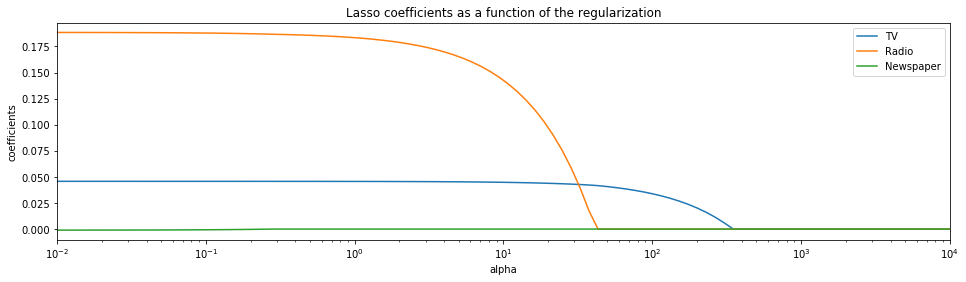

In [150]:
columns = ['TV', 'Radio', 'Newspaper']
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

Another example of using lasso:

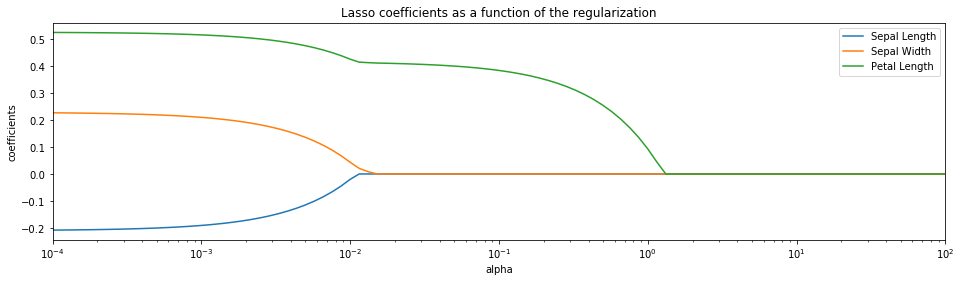

In [151]:
alphas_lasso = np.logspace(-4, 2, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha = i).fit(iris.x, iris.y)
    coef_lasso.append(lasso.coef_)

columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

### Ridge v.s. Lasso

![l1vsl2](pic/l1vsl2.png)

Comparing the path of ridge with the path of lasso:

- In ridge regression, all the coefficients tend to reach 0 at the same time.
- In lasso, the coefficients tend towards 0 one by one.
- Lasso selects features with th eappropriate penalty.

<img src="http://jamesmccammondotcom.files.wordpress.com/2014/04/screen-shot-2014-04-19-at-11-19-00-pm.png?w=1200" style="width: 300px;">
This picture comes from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

**Which one to use?**

- Neither ridge regression nor lasso will universally dominate the other.

- In general, one might expect lasso to perform better when the response is a function of only a relatively small number of predictors. However, the number of predictors that is related to the response is never known.

- A technique such as cross-validation can be used in order to determine which approach is better on a particular data set.


<p><a name="elastic"></a></p>
### ElasticNet

- ElasticNet is a linear regression model that combines L1 with L2 regularization 
- This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
- ElasticNet is useful when there are multiple features correlated with one another.

<p><a name="elastic-sklearn"></a></p>

### ElasticNet in Scikit-Learn

Here is the objective function of ElasticNet:
$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha \rho | \theta |_1 + \frac{\alpha(1-\rho)}{2} \parallel \theta \parallel_2^2$$
where $n$ refers to the number of observations, and $0 \le \rho \le1$.

- $\alpha$ controls the effects of regularization.
- $\rho$ control the convex combination of L1 and L2. 
    - $\rho = 0$ degenerates back to ridge regression
    - $\rho = 1$ degenerates back to lasso

In [152]:
## coefficients
elastic = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic.fit(x, y) # fit model
elastic.coef_, elastic.intercept_ # coefficients

(array([ 0.04570901,  0.18530658, -0.        ]), 2.9903600618190662)

- The argument *alpha* corresponds to $\alpha$.
- The argument *l1_radio* corresponds to $\rho$.

In [153]:
## determination
print("The determination of ElasticNet is: %.4f" %elastic.score(x, y))

The determination of ElasticNet is: 0.8971


In [154]:
## prediction
elastic.predict([[5.2, 18.5, 3.7]])

array([ 6.65621868])

The path of ElasticNet:

- Here we perform ElasticNet on the advertise data. We first create a list of $\alpha$

In [155]:
alphas_elastic = np.logspace(-2, 4, 1000)
coef_elastic = []

- Write a for loop to train an lasso regression for each α in the alphas_lasso. Collect the resulted coefficients into coef_lasso

In [156]:
for i in alphas_elastic:
    elastic = linear_model.ElasticNet(l1_ratio =0.5)
    elastic.set_params(alpha = i)
    elastic.fit(x, y)
    coef_elastic.append(elastic.coef_)

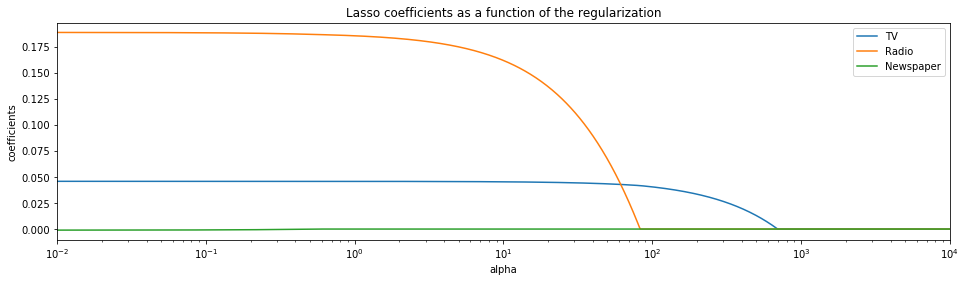

In [157]:
columns = ['TV', 'Radio', 'Newspaper']
df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

<p><a name="grid"></a></p>
## Grid Search
- Linear regression with regularization was a specific algorithm to speed up the computation. 
- For parameters in the other models, we can only try all the possible values and then choose the best one.
- The grid search provided by **GridSearchCV** exhaustively generates candidates from a grid of parameter values specified.
- The **GridSearchCV** instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

Search the best parameter for **KNN**:

In [158]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
iris = datasets.load_iris()
## set the possible parameters from 3 to 30

grid_param = [{'n_neighbors': range(3, 31)}]
## fit all models
para_search = GridSearchCV(estimator=knn, param_grid=grid_param, scoring='accuracy', cv=5).fit(iris.data, iris.target)

- Fit model on the iris data set.
- In this case, we perform 5-fold cross validation, which is defined by *cv=5*.
- Choose the best parameter by the accuracy of the models.
- The parameter 'n_neighbors' ranges in [3, 4, 5, ..., 30].


The **cv\_results\_** attributes stores scores and many other values from the grid search:

In [160]:
para_search.cv_results_

{'mean_fit_time': array([ 0.00048075,  0.00035229,  0.00034361,  0.00036526,  0.00036578,
         0.00058126,  0.00044141,  0.00039954,  0.00049   ,  0.00044699,
         0.00040741,  0.00037408,  0.0003212 ,  0.00027385,  0.00026383,
         0.00024886,  0.00022593,  0.00027194,  0.00027404,  0.00041242,
         0.00023866,  0.00021944,  0.00029016,  0.00026755,  0.00029349,
         0.0003284 ,  0.00033574,  0.00030394]),
 'mean_score_time': array([ 0.0007338 ,  0.00069146,  0.00067415,  0.00070033,  0.00069642,
         0.00105834,  0.00091286,  0.00081744,  0.00073543,  0.0011477 ,
         0.00100842,  0.00073814,  0.00069747,  0.00057416,  0.00049481,
         0.00053697,  0.00047383,  0.0005806 ,  0.00066295,  0.00093899,
         0.00051417,  0.00047755,  0.00061941,  0.00059571,  0.00060749,
         0.00054264,  0.00072756,  0.00069647]),
 'mean_test_score': array([ 0.96666667,  0.97333333,  0.97333333,  0.98      ,  0.98      ,
         0.96666667,  0.97333333,  0.98     

Before scikit-learn 0.18, the **grid\_scores\_** was the primary attribute to get scores for all parameters:

In [161]:
para_search.grid_scores_

/Users/rheineke/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3},
 mean: 0.97333, std: 0.01333, params: {'n_neighbors': 4},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 5},
 mean: 0.98000, std: 0.01633, params: {'n_neighbors': 6},
 mean: 0.98000, std: 0.01633, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 9},
 mean: 0.98000, std: 0.02667, params: {'n_neighbors': 10},
 mean: 0.98000, std: 0.02667, params: {'n_neighbors': 11},
 mean: 0.98000, std: 0.02667, params: {'n_neighbors': 12},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 13},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 14},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 15},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 16},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 17},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 18},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 19},
 mea

- **best\_score\_**: Score of best_estimator on the hold out data.
- **best\_params\_**: Parameter setting that gave the best results on the hold out data.

In [162]:
print(para_search.best_score_)
print(para_search.best_params_)

0.98
{'n_neighbors': 6}


The best parameter here is 6, and the corresponding accuracy is 98%.

- At last, we implement KNN with the best parameter on the whole data set.
- **best\_estimator\_** : Estimator that was chosen by the search, i.e. estimator which gave highest score on the hold out data.

In [163]:
para_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [164]:
knn_best = para_search.best_estimator_
knn_best.fit(iris.data, iris.target)
knn_best.score(iris.data, iris.target)

0.97333333333333338

Here is a more complicated case:
- Set the 'weights' parameter to be 'uniform' or 'distance'.
- Set the parameter 'n_neighbors' to be 3 to 30.
- Set 'p' may equals to 1 or 2.

**GridSearchCV** will fit all the possible combinations of the parameters, and choose the best model by the accuracy with 5-fold cross-validation.

In [165]:
grid_param2 = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]
para_search2 = GridSearchCV(knn, grid_param2, scoring='accuracy', cv=5)
para_search2.fit(iris.data, iris.target)
para_search2.cv_results_

{'mean_fit_time': array([ 0.00062056,  0.0005836 ,  0.00038929,  0.00043912,  0.00037766,
         0.00037637,  0.00044885,  0.00034742,  0.00040402,  0.00043907,
         0.00033078,  0.00035949,  0.00033913,  0.00029397,  0.00024824,
         0.00028629,  0.0002367 ,  0.00031357,  0.00023632,  0.00022426,
         0.00021596,  0.00021667,  0.00029678,  0.00035706,  0.00037346,
         0.00028806,  0.00031767,  0.00032811,  0.000248  ,  0.00025802,
         0.00026884,  0.00028691,  0.00030341,  0.00024934,  0.00022297,
         0.00022259,  0.00036144,  0.00028863,  0.00023375,  0.00021758,
         0.00023108,  0.00023437,  0.00023694,  0.00023875,  0.00027857,
         0.00039349,  0.00040903,  0.00031624,  0.00027885,  0.00028486,
         0.00034418,  0.00050197,  0.00039382,  0.00040445,  0.0002986 ,
         0.00030875,  0.00030165,  0.00027275,  0.00028305,  0.00031095,
         0.00028534,  0.00023379,  0.00035667,  0.00039687,  0.00025854,
         0.00031805,  0.00027642, 

In [166]:
para_search2.grid_scores_

/Users/rheineke/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.02494, params: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.02494, params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 mean: 0.95333, std: 0.03399, params: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.02494, params: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'},
 mean: 0.97333, std: 0.01333, params: {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'},
 mean: 0.96667, std: 0.02108, params: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'},
 mean: 0.96000, std: 0.03266, params: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.03266, params: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
 mean: 0.96667, std: 0.0365

In [167]:
print(para_search2.best_params_)
print(para_search2.best_score_)

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.986666666667


This time the best model is a weighted KNN with 10 neighbors and euclidean distance.

Try to use cross validation and grid search to fit a better KNN model on the Digit Recognizer Compitition.

<p><a name="validation_curves"></a></p>
## Diagnostic Tools - Validation Curves
- Grid search is the appropriate way to optimize multiple hyperparameters simultaneously 
- Validation curves do not replace grid search, but they can show the influence of any one hyperparameter on the model fit

Show the validation curve of the number of neighbors for **KNN**:

In [168]:
from sklearn.model_selection import validation_curve
param_range = range(3, 31)
kwargs = dict(param_name='n_neighbors', param_range=param_range)
train_scores, test_scores = validation_curve(knn, iris.data, iris.target, **kwargs)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


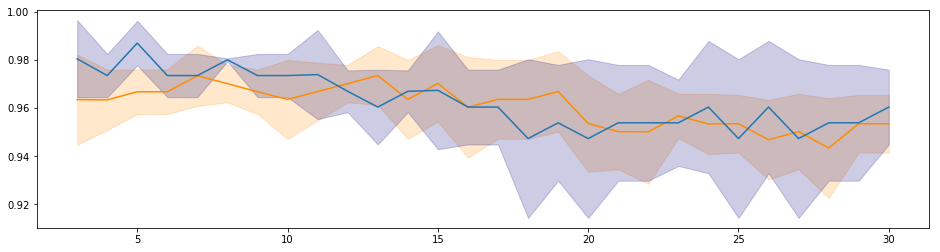

In [169]:
# Train mean and standard deviation
train_color = "darkorange"
plt.plot(param_range, train_scores_mean, color=train_color)
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range, y1=train_y1, y2=train_y2, color=train_color, alpha=0.2)

# Test mean and standard deviation
test_color = "navy"
plt.plot(param_range, test_scores_mean)
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.fill_between(param_range, y1=test_y1, y2=test_y2, color=test_color, alpha=0.2)
plt.show()

<p><a name="validation_curves"></a></p>
## Diagnostic Tools - Learning Curves
- By plotting model training and validation scores as a function of the training size, we can easily detect whether the model suffers from overfitting or underfitting
- Learning and validation curves are essential debugging tools for model selection

scikit-learn provides a learning_curve function, but we need to write a function to plot the data. Here we see the same **KNN** algorithm plotted in the learning curve:

In [182]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimators, X, y, cv=10, scoring=None, n_jobs=1):
    figsize = (16 * len(estimators), 4.8)
    fig, axes = plt.subplots(nrows=1, ncols=len(estimators), figsize=figsize)

    if len(estimators) == 1:
        axes = [axes]

    for ax, estimator in zip(axes, estimators):
        kwargs = dict(
            estimator=estimator,
            X=X,
            y=y,
            train_sizes=np.linspace(start=0.1, stop=1.0, num=10),
            cv=cv,
            scoring=None,
            n_jobs=n_jobs,
        )
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=estimator,
            X=X,
            y=y,
            train_sizes=np.linspace(start=0.1, stop=1.0, num=10),
            cv=cv,
            scoring=None,
            n_jobs=n_jobs,
        )
        xlabel = 'Number of training samples'
        _plot_curve(
            axes=ax,
            train_sizes=train_sizes,
            train_scores=train_scores,
            test_scores=test_scores,
            xlabel=xlabel,
            scoring=scoring
        )
        ax.set_title(estimator.__class__.__name__)
    return fig

def _plot_curve(axes, train_sizes, train_scores, test_scores, xlabel,
                xscale=None, scoring=None):
    if scoring is None:
        scoring = 'score'

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    lbl = 'training {}'.format(scoring)
    train_kwds = dict(color='blue', marker='o', markersize=5, label=lbl)
    axes.plot(train_sizes, train_mean, **train_kwds)
    axes.fill_between(
        train_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color='blue'
    )

    lbl = 'validation {}'.format(scoring)
    tst_kwds = dict(
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label=lbl
    )
    axes.plot(train_sizes, test_mean, **tst_kwds)
    axes.fill_between(
        train_sizes,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color='green'
    )
    axes.grid()
    if xscale is not None:
        axes.set_xscale(xscale)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(scoring.capitalize())
    axes.legend(loc='upper right')
    # Calculate ymin
    min_train = np.min(train_mean - train_std)
    min_test = np.min(test_mean - test_std)
    ymin = np.round(min(min_train, min_test) - .05, decimals=1)
    axes.set_ylim([ymin, 1.0])

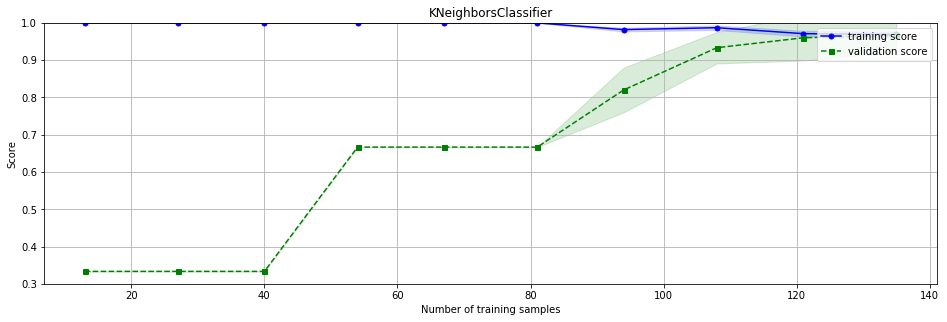

In [183]:
plot_learning_curve([knn], iris.data, iris.target)

<p><a name="ref"></a></p>
## Reference

- [Homepage of sklearn](http://scikit-learn.org/)

- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

- [Python Machine Learning by Sebastian Raschka](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning)